## Cosine Similarity Calculations
Use the cosine similarity to compare both a numeric data within a plane and texts/documents for string matching.

In [2]:
#Import Libraries
import pandas as pda
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
#Loading dataset into Pandas Dataframe
df = pda.read_csv('distance_dataset_1.csv', index_col='Unnamed: 0')


In [8]:
#Check data 
df.head

<bound method NDFrame.head of              X         Y         Z  ClusterID
0     5.135779  4.167542  5.787635          4
1     4.280721  5.770909  6.091044          4
2     8.329098  7.540436  3.247239          2
3     5.470224  5.069249  5.768313          4
4     2.381797  2.402374  3.879101          1
...        ...       ...       ...        ...
1995  4.616245  4.019561  5.522939          4
1996  4.753185  5.065076  8.074947          3
1997  2.000186  2.351911  6.779311          1
1998  4.735917  5.642677  4.855780          4
1999  4.955436  5.270550  7.844768          3

[2000 rows x 4 columns]>

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [38]:
#create a 2D and a 3D matrix from the dataframe. 2D matrix contains the 'Y'&'Z' columns. 3D matrix should contains 'X','Y', &'Z' columns
yz = df.drop(columns=['X', 'ClusterID'])
xyz = df.drop(columns=['ClusterID'])

yz_matrix = yz.to_numpy()
xyz_matrix = xyz.to_numpy()

In [41]:
#Check Shape of matrices
yz_matrix.shape


(2000, 2)

In [42]:
#Check Shape of matrices
xyz_matrix.shape

(2000, 3)

In [43]:
#Calculate the cosine similarity for  matrices with reference planes of 5,5 and 5,5,5. Subtract those measures from 1 in new features.
simCosine3D = 1. - cosine_similarity(xyz_matrix, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(yz_matrix, [[5,5]], 'cosine')

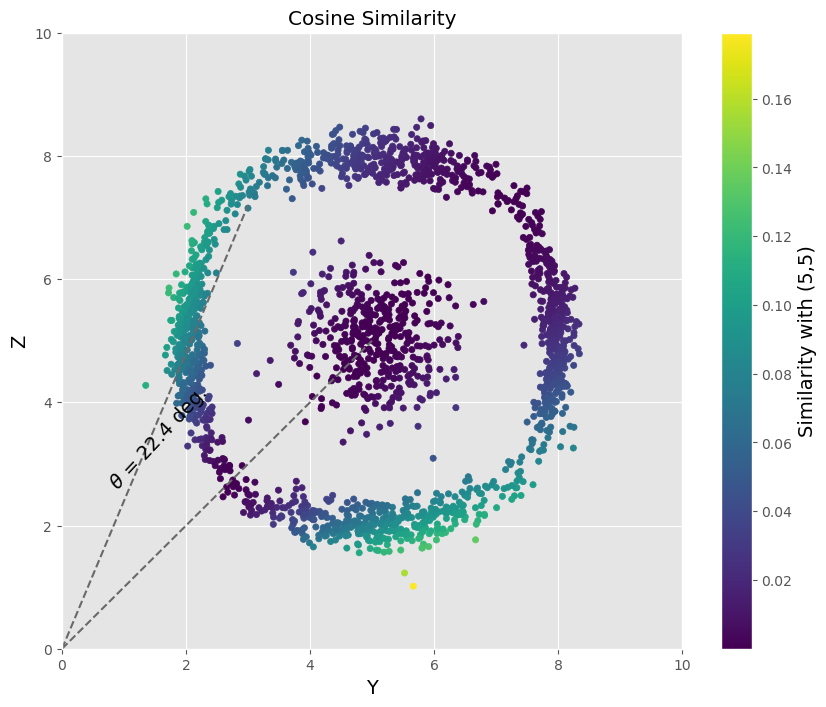

In [44]:
#Using the 2D matrix and the reference plane of (5,5), visualize the scatter plot to view  similarity is calculated using the Cosine angle
figCosine = plt.figure(figsize=[10,8])

plt.scatter(df.Y, df.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='dimgray')
plt.plot([0,3],[0,7.2], '--', color='dimgray')
plt.text(0.7,2.6,r'$\theta$ = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)



Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

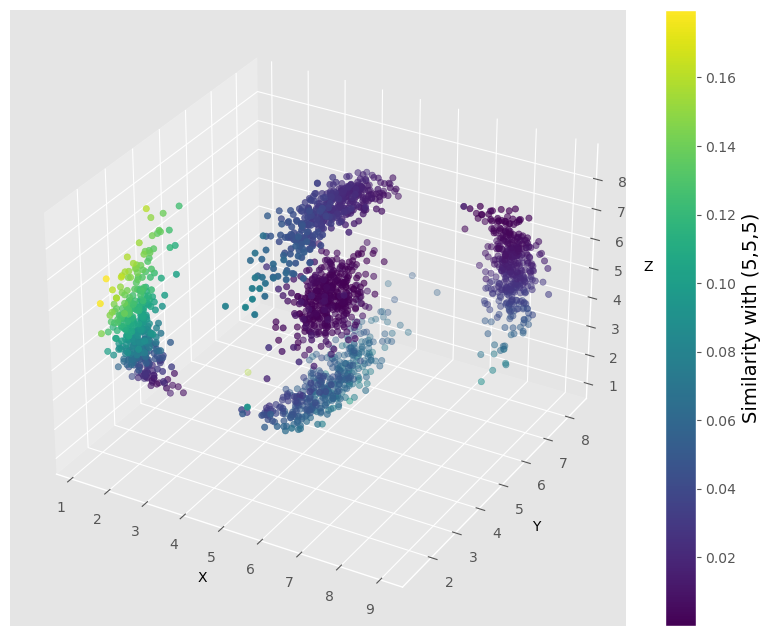

In [45]:
#Plot the 3D matrix with  similarity and the reference plane (5,5,5).
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(xyz_matrix[:,0], xyz_matrix[:,1], xyz_matrix[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

### Cosine Similarity with text data & documents


In [47]:
#Using Cosine Similarity to compare documents for other natural language proecessing needs. Use count vectorizer to create a vector for each unique word in our two documents 
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
document_1 = "An American Airlines plane was forced to return to the airport Sunday morning in Columbus, Ohio, after a possible bird strike may have sparked an engine fire."
document_2 = "The Rufous Hummingbird is magical. The male’s iridescent throat glows brighter than a shiny copper penny and like most hummingbirds, whizzes through the air curiously hovering right in front of humans who ponder them. The first time Mike Parr, president of the American Bird Conservancy, saw one, it was feeding on blossoms of a lemon tree in California."

corpus = [document_1,document_2]

X_train_counts = count_vect.fit_transform(corpus)

pda.DataFrame(X_train_counts.toarray(),columns=count_vect.get_feature_names(),index=['Document 0','Document 1'])

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,after,air,airlines,airport,american,an,and,bird,blossoms,brighter,...,the,them,throat,through,time,to,tree,was,whizzes,who
Document 0,1,0,1,1,1,2,0,1,0,0,...,1,0,0,0,0,2,0,1,0,0
Document 1,0,1,0,0,1,0,1,1,1,1,...,5,1,1,1,1,0,1,1,1,1


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [48]:
#Use frequency tool  TF-IDF to convert the vectors to unique measures
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(corpus)
pda.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,after,air,airlines,airport,american,an,and,bird,blossoms,brighter,...,the,them,throat,through,time,to,tree,was,whizzes,who
Document 0,0.190584,0.00000,0.190584,0.190584,0.135602,0.381169,0.00000,0.135602,0.00000,0.00000,...,0.135602,0.00000,0.00000,0.00000,0.00000,0.381169,0.00000,0.135602,0.00000,0.00000
Document 1,0.000000,0.12109,0.000000,0.000000,0.086157,0.000000,0.12109,0.086157,0.12109,0.12109,...,0.430783,0.12109,0.12109,0.12109,0.12109,0.000000,0.12109,0.086157,0.12109,0.12109


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [49]:
#apply the Cosine Similarity measure to calculate how similar Document 0 is compared to any other document in the corpus
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.11683032]])

In [54]:
#Use another set of documents for analysis
document_a = "Bed Bath & Beyond, the store for seemingly everything in your home during the 1990s and 2000s, filed for bankruptcy on Sunday.Thank you to all of our loyal customers. We have made the difficult decision to begin winding down our operations, a statement at the top of the company’s website said Sunday morning."

document_b = "America’s leading specialty baby products retailer will shutter its 120 stores, a consequence of parent company Bed Bath & Beyond’s bankruptcy filing on Sunday.buybuy BABY and its website will remain open for now, along with 360 Bed Bath & Beyond stores, as the company secured a $240 million loan to help fund its operations during bankruptcy."
NewCorpus = [document_a, document_b]


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [60]:
#Apply the count vectorizer to the New document (NewCorpus) to transform it into vectors
X_train_counts = count_vect.fit_transform(NewCorpus)
print (X_train_counts)

  (0, 14)	1
  (0, 13)	1
  (0, 16)	1
  (0, 61)	5
  (0, 57)	1
  (0, 28)	2
  (0, 53)	1
  (0, 25)	1
  (0, 33)	1
  (0, 70)	1
  (0, 32)	1
  (0, 24)	1
  (0, 1)	1
  (0, 8)	1
  (0, 2)	1
  (0, 26)	1
  (0, 12)	1
  (0, 43)	1
  (0, 59)	2
  (0, 60)	1
  (0, 69)	1
  (0, 62)	2
  (0, 5)	1
  (0, 42)	2
  (0, 46)	2
  :	:
  (1, 11)	2
  (1, 48)	1
  (1, 50)	1
  (1, 66)	2
  (1, 54)	1
  (1, 34)	3
  (1, 0)	1
  (1, 58)	2
  (1, 19)	1
  (1, 47)	1
  (1, 27)	1
  (1, 17)	1
  (1, 49)	1
  (1, 44)	1
  (1, 41)	1
  (1, 6)	1
  (1, 68)	1
  (1, 4)	1
  (1, 9)	1
  (1, 52)	1
  (1, 3)	1
  (1, 39)	1
  (1, 36)	1
  (1, 31)	1
  (1, 29)	1


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [61]:
#Converting the vector counts to a Pandas dataframe
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(NewCorpus)
pda.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Document 0','Document 1'])

/Users/saadhameed/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,120,1990s,2000s,240,360,all,along,america,and,as,...,the,to,top,we,website,will,winding,with,you,your
Document 0,0.000000,0.132665,0.132665,0.000000,0.000000,0.132665,0.000000,0.000000,0.094392,0.000000,...,0.471960,0.188784,0.132665,0.132665,0.094392,0.000000,0.132665,0.000000,0.132665,0.132665
Document 1,0.128898,0.000000,0.000000,0.128898,0.128898,0.000000,0.128898,0.128898,0.091712,0.128898,...,0.091712,0.091712,0.000000,0.000000,0.091712,0.257797,0.000000,0.128898,0.000000,0.000000


 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [62]:
#Applying TF-IDF to convert the vectors to unique frequency measures
tfidf_vector = TfidfVectorizer()
sparse_matrix = tfidf_vector.fit_transform(NewCorpus)
print (sparse_matrix)

  (0, 40)	0.13266468731272502
  (0, 51)	0.13266468731272502
  (0, 65)	0.09439201766545395
  (0, 18)	0.09439201766545395
  (0, 63)	0.13266468731272502
  (0, 10)	0.13266468731272502
  (0, 56)	0.13266468731272502
  (0, 45)	0.09439201766545395
  (0, 23)	0.13266468731272502
  (0, 67)	0.13266468731272502
  (0, 15)	0.13266468731272502
  (0, 21)	0.13266468731272502
  (0, 22)	0.13266468731272502
  (0, 38)	0.13266468731272502
  (0, 30)	0.13266468731272502
  (0, 64)	0.13266468731272502
  (0, 20)	0.13266468731272502
  (0, 37)	0.13266468731272502
  (0, 46)	0.26532937462545003
  (0, 42)	0.1887840353309079
  (0, 5)	0.13266468731272502
  (0, 62)	0.1887840353309079
  (0, 69)	0.13266468731272502
  (0, 60)	0.13266468731272502
  (0, 59)	0.1887840353309079
  :	:
  (1, 0)	0.12889839224635674
  (1, 34)	0.3866951767390702
  (1, 54)	0.12889839224635674
  (1, 66)	0.2577967844927135
  (1, 50)	0.12889839224635674
  (1, 48)	0.12889839224635674
  (1, 11)	0.2577967844927135
  (1, 55)	0.12889839224635674
  (1, 35)	0.

In [36]:
#Use the cosine similarity function to get measures of similarity of the NewCorpus document
cosine_similarity(trsfm[0:1], trsfm)


array([[1.        , 0.27168383]])